In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
falcon9_data = pd.read_csv('falcon9_data.csv')
falcon9_data.head()

,Flight_Number,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2010-06-04,Falcon 9,5694.158673,LEO,CCSFS SLC 40,None - None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
1,2,2010-12-08,Falcon 9,5694.158673,LEO,CCSFS SLC 40,None - None,1,False,False,False,NaN,1.0,0,B0004,-80.577366,28.561857
2,3,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None - None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
3,4,2012-10-08,Falcon 9,800.000000,ISS,CCSFS SLC 40,None - None,1,False,False,False,NaN,1.0,0,B0006,-80.577366,28.561857
4,5,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None - None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857


In [ ]:
def classes(data) :
   landing_success , landing_type = data.split("-")
   if landing_success == "True " :
      return 1
   else :
      return 0

In [ ]:
falcon9_data['Class'] = falcon9_data['Outcome'].apply(classes)

In [ ]:
falcon9_data.head()

,Flight_Number,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,5694.158673,LEO,CCSFS SLC 40,None - None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2010-12-08,Falcon 9,5694.158673,LEO,CCSFS SLC 40,None - None,1,False,False,False,NaN,1.0,0,B0004,-80.577366,28.561857,0
2,3,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None - None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
3,4,2012-10-08,Falcon 9,800.000000,ISS,CCSFS SLC 40,None - None,1,False,False,False,NaN,1.0,0,B0006,-80.577366,28.561857,0
4,5,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None - None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0


## what is the percentage of the successful landings

In [ ]:
falcon9_data["Class"].value_counts()

,count
Class,
1,62
0,36


In [ ]:
x = falcon9_data["Class"].value_counts().index
y = falcon9_data["Class"].value_counts().values/98

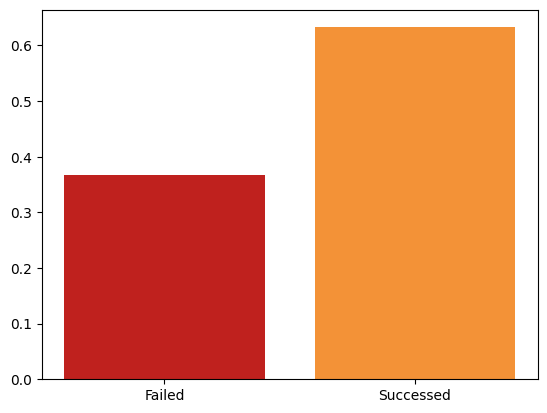

In [ ]:
plt.bar(x,y , color = ["#F39237" , "#BF211E"])
plt.xticks([0,1],["Failed" , "Successed"])
plt.grid(False)
plt.show()

<h3 style = "color :#f06b18 ">What is the success rate of each launching site ? </h3>

In [ ]:
site_data = falcon9_data.groupby("LaunchSite")["Class"].agg(['sum', 'count'])
site_data

,sum,count
LaunchSite,,
CCSFS SLC 40,34,60
KSC LC 39A,18,23
VAFB SLC 4E,10,15


In [ ]:
site_data['SuccessRate'] = site_data['sum'] / site_data['count']
site_data

,sum,count,SuccessRate
LaunchSite,,,
CCSFS SLC 40,34,60,0.566667
KSC LC 39A,18,23,0.782609
VAFB SLC 4E,10,15,0.666667


In [ ]:
plt.style.use("ggplot")

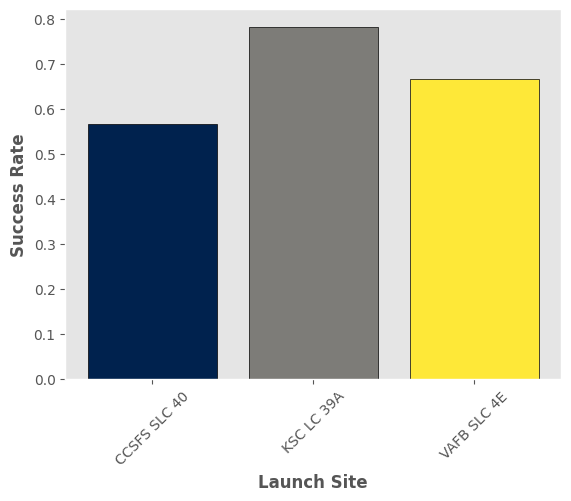

In [ ]:
import matplotlib.cm as cm
cmap = cm.cividis
colors = cmap(np.linspace(0, 1, len(site_data)))
x = site_data.index
y = site_data["SuccessRate"]
plt.bar(x, y, edgecolor="k", color=colors)
plt.xticks(rotation=45)
plt.xlabel("Launch Site", fontweight='bold')
plt.ylabel("Success Rate", fontweight='bold')
plt.grid(False)
# Show the plot
plt.show()

# What is the success rate across the years ?

In [ ]:
falcon9_data['Date'] = pd.to_datetime(falcon9_data['Date'])

In [ ]:
years = falcon9_data['Date'].dt.year

In [ ]:
success_rate = falcon9_data.groupby(years)['Class'].mean()
success_rate

,Class
Date,
2010,0.000000
2012,0.000000
2013,0.000000
2014,0.333333
2015,0.285714
2016,0.555556
2017,0.833333
2018,0.550000
2019,0.909091


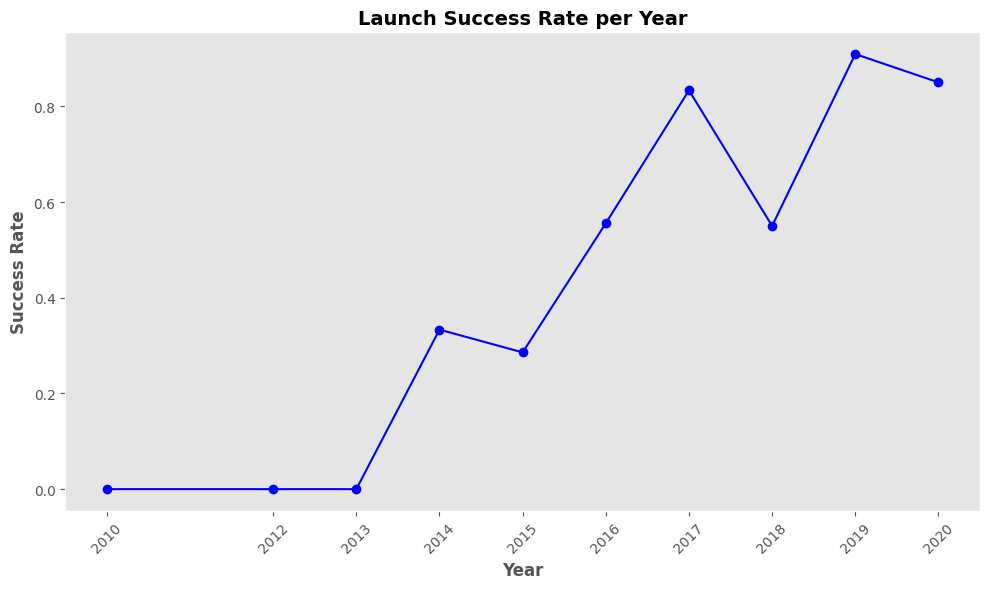

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(success_rate.index, success_rate.values, marker='o',color ="b")
plt.title('Launch Success Rate per Year', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Success Rate', fontsize=12, fontweight='bold')
plt.grid()
plt.xticks(success_rate.index, rotation=45)
plt.tight_layout()
plt.show()

# What is the Launches numbers across the years ?

## Launches number per year

In [ ]:
launches_per_year = years.value_counts().sort_index().to_frame()
launches_per_year

,count
Date,
2010,2
2012,2
2013,3
2014,6
2015,7
2016,9
2017,18
2018,20
2019,11


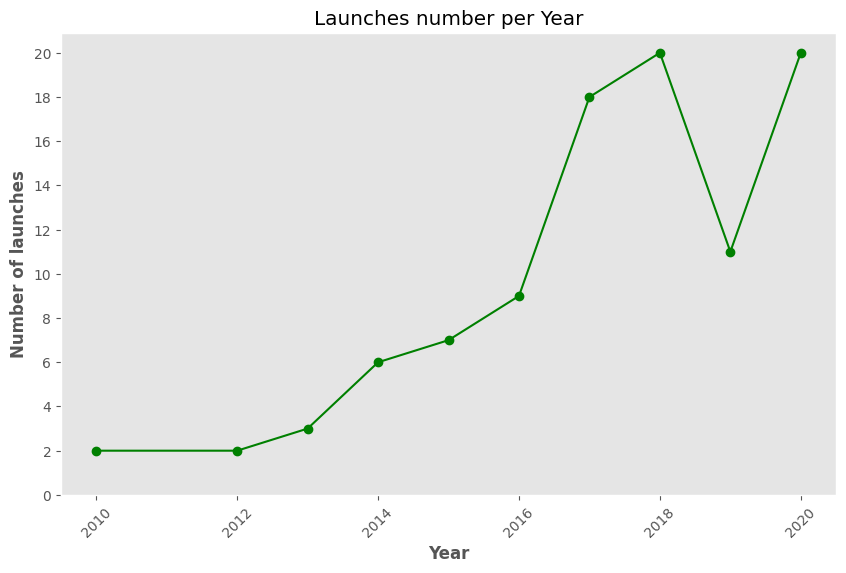

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(launches_per_year.index, launches_per_year["count"], marker="o", color="g")
plt.xticks(rotation=45)
plt.xlabel("Year", fontweight="bold")
plt.ylabel("Number of launches", fontweight="bold")
plt.title("Launches number per Year")
plt.yticks(range(0, int(launches_per_year["count"].max()) + 1,2))
plt.grid(False)
plt.show()


# Launching sites payload Distrbution

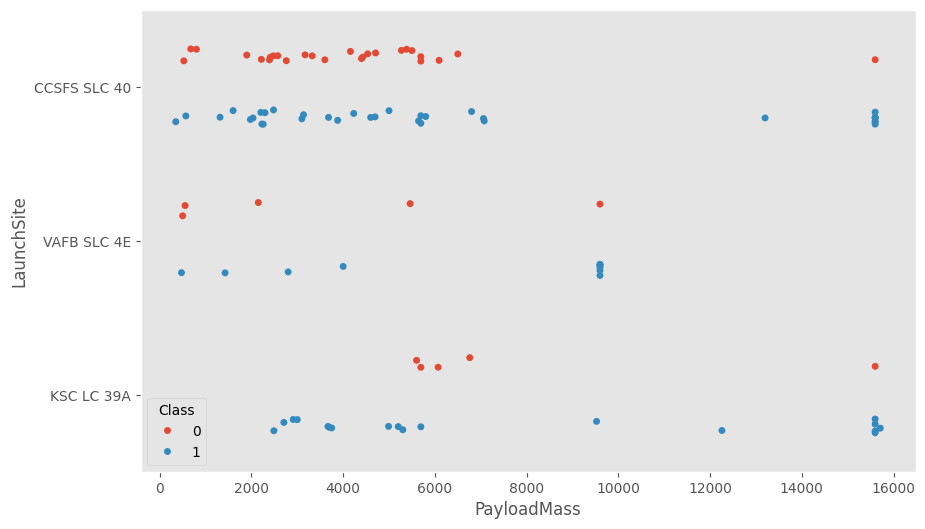

In [ ]:
plt.figure(figsize=(10, 6))
sns.stripplot(x="PayloadMass", y="LaunchSite", data=falcon9_data, hue="Class", dodge=True)
plt.grid(False)
plt.show()

# Payload mass Distrbution by Orbit

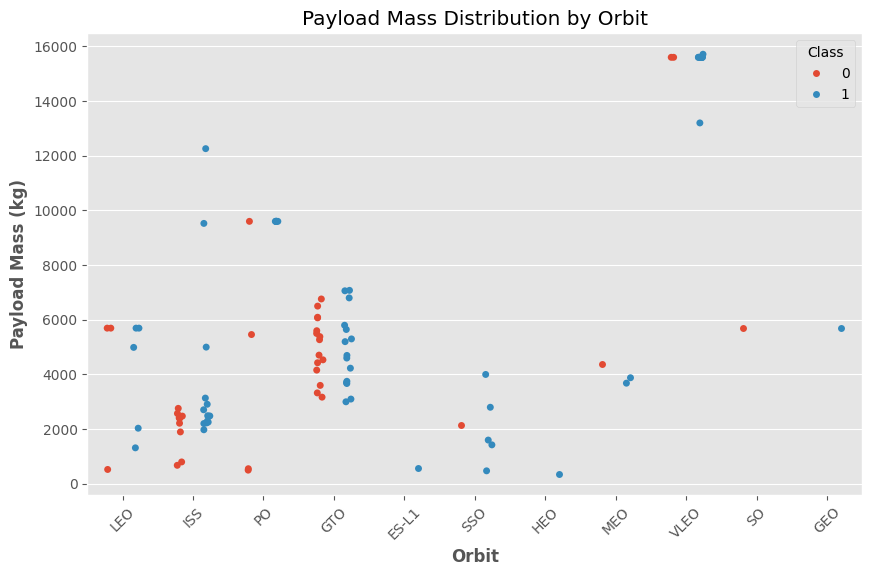

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a strip plot for PayloadMass by Orbit
plt.figure(figsize=(10, 6))
sns.stripplot(x="Orbit", y="PayloadMass", data=falcon9_data, jitter=True, hue="Class", dodge=True)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Set the labels and title
plt.xlabel("Orbit", fontweight="bold")
plt.ylabel("Payload Mass (kg)", fontweight="bold")
plt.title("Payload Mass Distribution by Orbit")

# Show the plot
plt.show()


In [ ]:
falcon9_data.head()

,Flight_Number,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,5694.158673,LEO,CCSFS SLC 40,None - None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2010-12-08,Falcon 9,5694.158673,LEO,CCSFS SLC 40,None - None,1,False,False,False,NaN,1.0,0,B0004,-80.577366,28.561857,0
2,3,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None - None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
3,4,2012-10-08,Falcon 9,800.000000,ISS,CCSFS SLC 40,None - None,1,False,False,False,NaN,1.0,0,B0006,-80.577366,28.561857,0
4,5,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None - None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0


# What Is the Correlation Between Orbit Type and Mission Success?

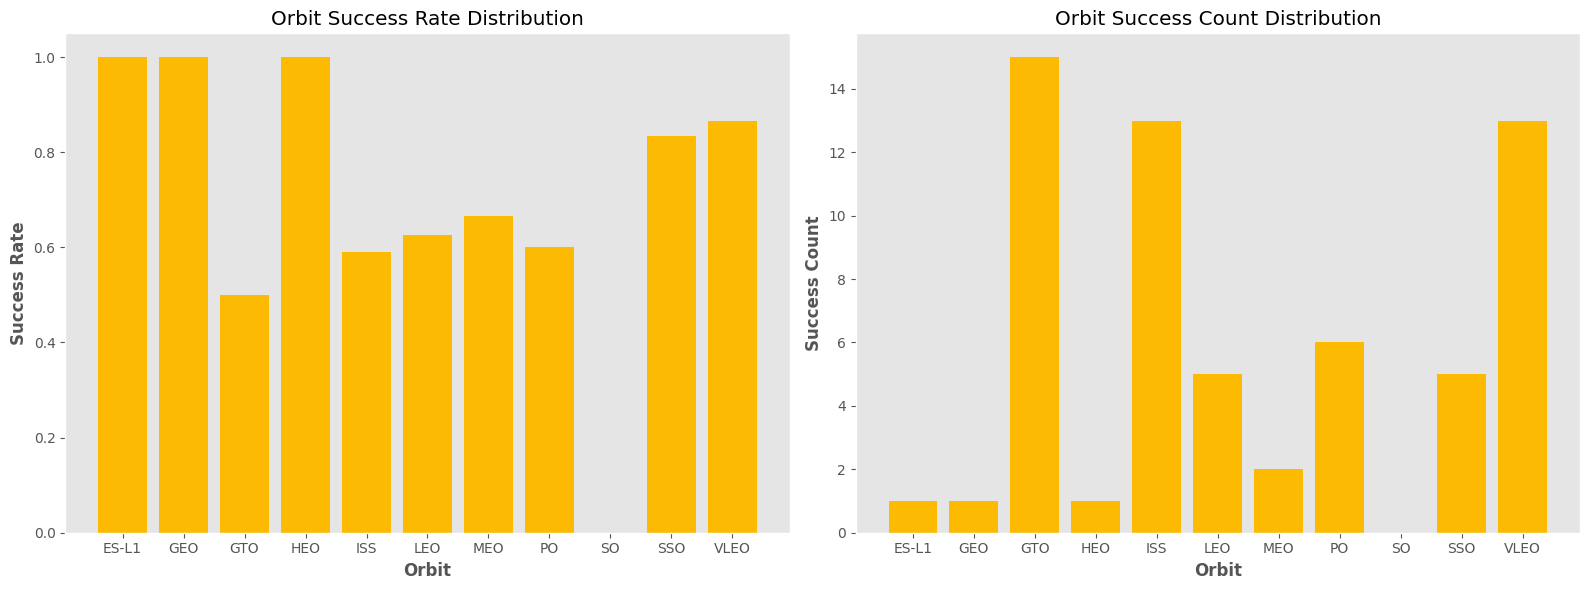

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
orbit_success_rate = falcon9_data.groupby(["Orbit"])["Class"].mean()
axes[0].bar(orbit_success_rate.index, orbit_success_rate.values, color="#fcba03")
axes[0].set_xlabel("Orbit", fontweight="bold")
axes[0].set_ylabel("Success Rate", fontweight="bold")
axes[0].set_title("Orbit Success Rate Distribution")
axes[0].grid(False)
orbit_success_count = falcon9_data.groupby(["Orbit"])["Class"].sum()
axes[1].bar(orbit_success_count.index, orbit_success_count.values, color="#fcba03")
axes[1].set_xlabel("Orbit", fontweight="bold")
axes[1].set_ylabel("Success Count", fontweight="bold")
axes[1].set_title("Orbit Success Count Distribution")
axes[1].grid(False)
plt.tight_layout()
plt.show()


## note that using success rate wasnt indicating enough as it showed that GEO is the lowest with success rate but its success count was the highest(14). and for HEO , GEO , ESL1 their success rate was 100% and there was 1 launch assigned to them

# What is the percentage of cores that have been reused

In [ ]:
reused_dist = falcon9_data["Reused"].value_counts()
reused_dist

,count
Reused,
False,57
True,41


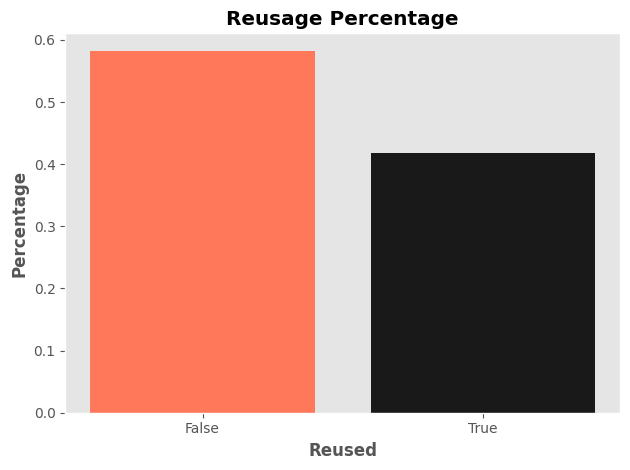

In [ ]:
plt.bar(reused_dist.index, reused_dist.values/98, color=["#FF785A", "#191919"])
plt.xticks([0, 1], ['False', 'True'])
plt.grid(False)
plt.xlabel("Reused", fontweight="bold")
plt.ylabel("Percentage", fontweight="bold")
plt.title("Reusage Percentage", fontweight="bold")
plt.tight_layout()

In [ ]:
falcon9_data.head()

,Flight_Number,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,5694.158673,LEO,CCSFS SLC 40,None - None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2010-12-08,Falcon 9,5694.158673,LEO,CCSFS SLC 40,None - None,1,False,False,False,NaN,1.0,0,B0004,-80.577366,28.561857,0
2,3,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None - None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
3,4,2012-10-08,Falcon 9,800.000000,ISS,CCSFS SLC 40,None - None,1,False,False,False,NaN,1.0,0,B0006,-80.577366,28.561857,0
4,5,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None - None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0


# What are the top 10 types of cores that led to successful landings ?

In [ ]:
core_success_rate = falcon9_data.groupby(["Serial"])["Class"].sum()
top_10_successful_cores = core_success_rate.nlargest(10)
top_10_successful_cores

,Class
Serial,
B1049,6
B1051,6
B1048,4
B1059,4
B1046,3
B1056,3
B1058,3
B1060,3
B1021,2


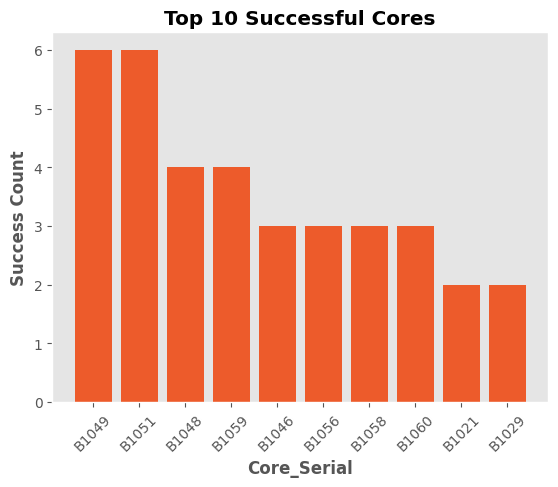

In [ ]:
plt.bar(top_10_successful_cores.index , top_10_successful_cores.values,color= "#ed5b2b")
plt.xlabel("Core_Serial", fontweight="bold")
plt.ylabel("Success Count", fontweight="bold")
plt.title("Top 10 Successful Cores", fontweight="bold")
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

## What are the blocks of these cores ?

In [ ]:
serial_block = falcon9_data[falcon9_data["Serial"].isin(top_10_successful_cores.index)][["Serial", "Block"]].drop_duplicates()
serial_block

,Serial,Block
22,B1021,2.0
29,B1029,3.0
54,B1046,5.0
59,B1048,5.0
61,B1049,5.0
69,B1051,5.0
70,B1056,5.0
76,B1059,5.0
85,B1058,5.0
88,B1060,5.0


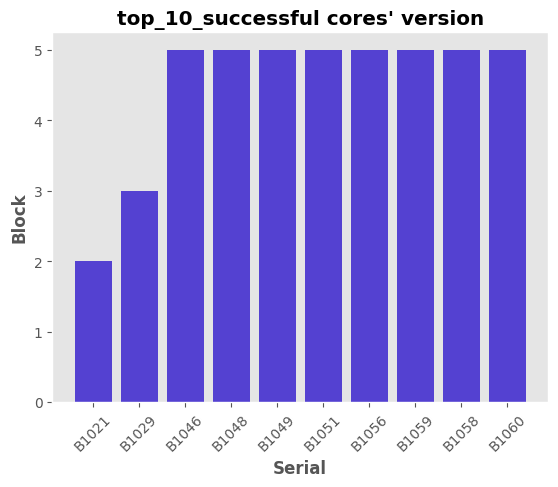

In [ ]:
plt.bar(serial_block["Serial"],serial_block["Block"],color= "#5441d1")
plt.xlabel("Serial", fontweight="bold")
plt.ylabel("Block", fontweight="bold")
plt.title("top_10_successful cores' version", fontweight="bold")
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

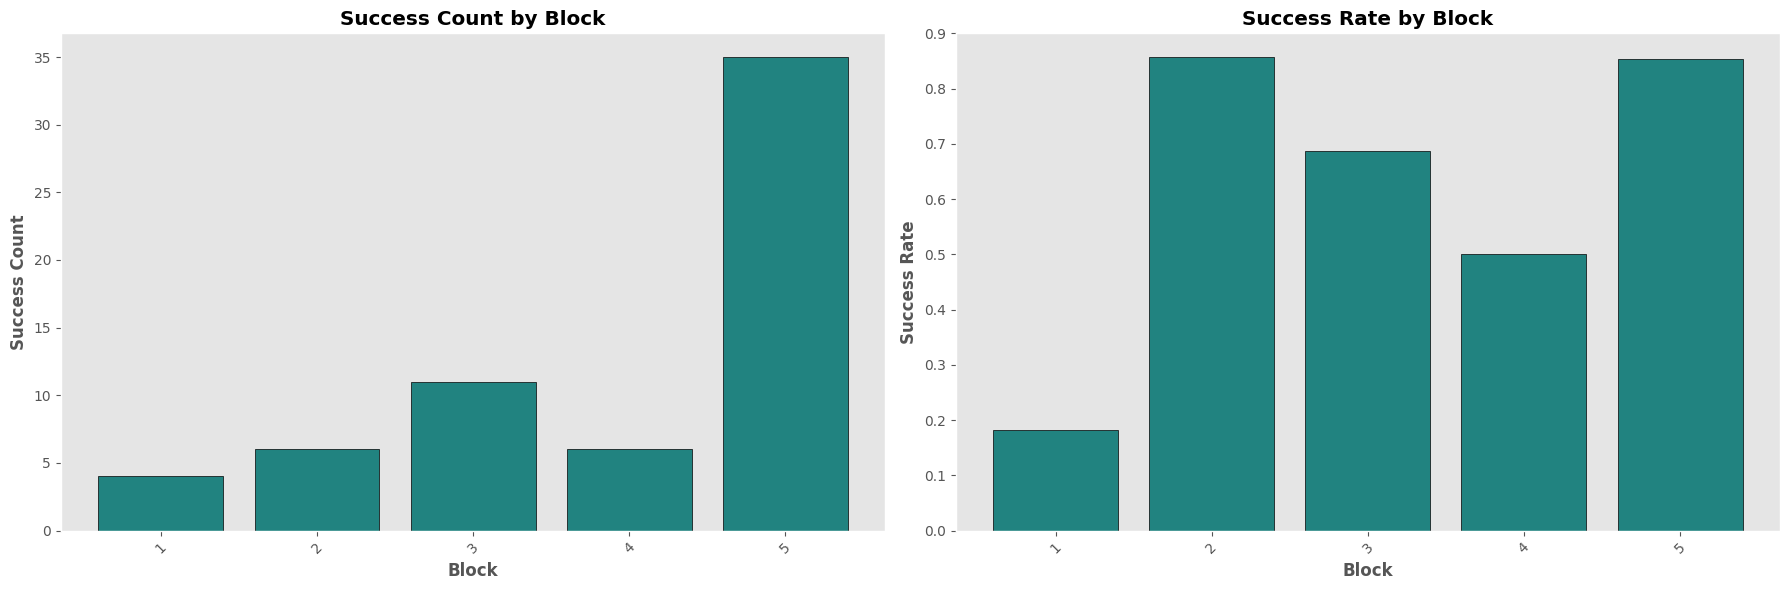

In [ ]:
block_success_rate_sum = falcon9_data.groupby("Block")["Class"].sum()
block_success_rate_sum = block_success_rate_sum.sort_values(ascending=False)
block_success_rate_mean = falcon9_data.groupby("Block")["Class"].mean()
block_success_rate_mean = block_success_rate_mean.sort_values(ascending=False)
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
axes[0].bar(block_success_rate_sum.index, block_success_rate_sum.values, color="#218380", edgecolor="k")
axes[0].set_xlabel("Block", fontweight="bold")
axes[0].set_ylabel("Success Count", fontweight="bold")
axes[0].set_title("Success Count by Block", fontweight="bold")
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(False)
axes[1].bar(block_success_rate_mean.index, block_success_rate_mean.values, color="#218380", edgecolor="k")
axes[1].set_xlabel("Block", fontweight="bold")
axes[1].set_ylabel("Success Rate", fontweight="bold")
axes[1].set_title("Success Rate by Block", fontweight="bold")
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(False)
plt.tight_layout()
plt.show()


#  this means if we want to launch a core it has to be of block 5.

# Payload Distrbution with Flight number

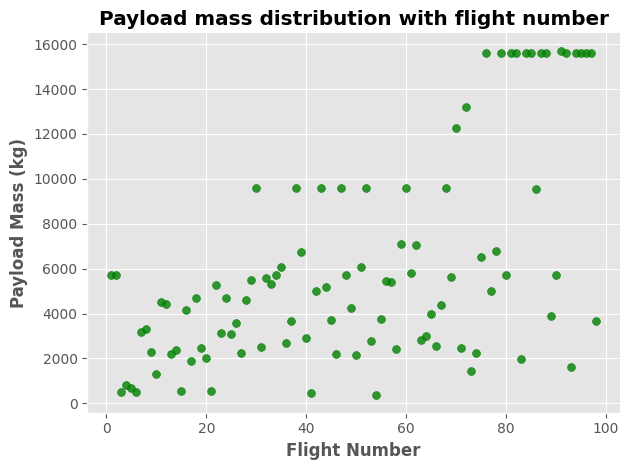

In [ ]:
sc = falcon9_data.plot(kind='scatter',    x='Flight_Number',   y='PayloadMass',color = "g",  s=32,  alpha=0.8)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("Payload mass distribution with flight number", fontweight="bold")
plt.xlabel("Flight Number", fontweight="bold")
plt.ylabel("Payload Mass (kg)", fontweight="bold")
plt.tight_layout()
plt.show()

#

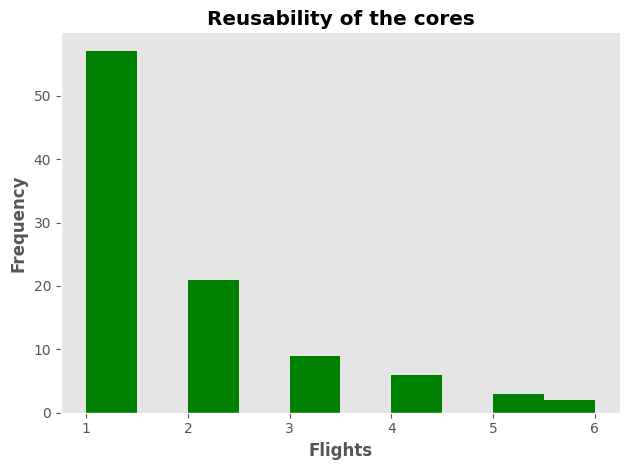

In [ ]:
falcon9_data['Flights'].plot(kind='hist',  title='Flights',color = 'g')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title("Reusability of the cores", fontweight="bold")
plt.xlabel("Flights", fontweight="bold")
plt.ylabel("Frequency", fontweight="bold")
plt.tight_layout()
plt.grid(False)

## this means the number of rockets that have been resued from 1 to 6 times decreased

## What are the cores that have been used for 6 times ?

In [ ]:
falcon9_data[falcon9_data["Flights"]==6][["Serial","Block"]]

,Serial,Block
91,B1049,5.0
95,B1051,5.0


## so until now if we are going to use cores it better to use B1049 B1051 (Block =5) as they are reusable up to 6 times or maybe more

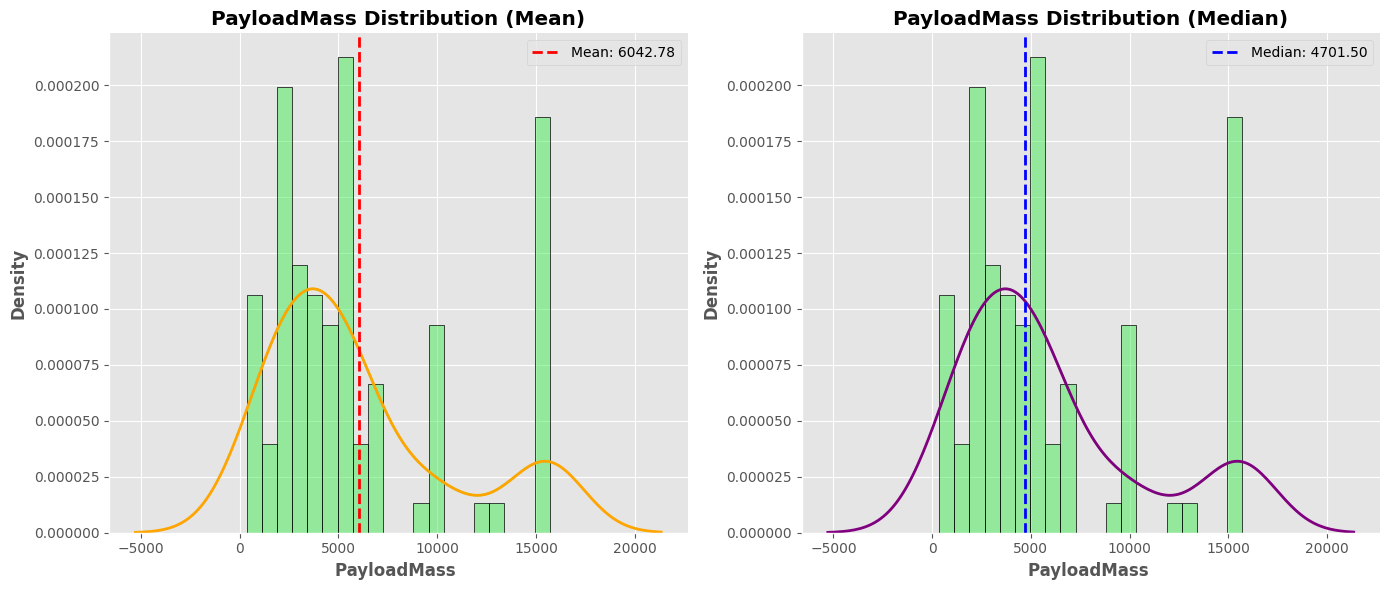

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(falcon9_data['PayloadMass'], bins=20, kde=True, color='#44eb55', edgecolor='k', ax=axes[0], stat="density")
sns.kdeplot(falcon9_data['PayloadMass'], color='orange', ax=axes[0], linewidth=2)  # Custom KDE color
mean_value = falcon9_data['PayloadMass'].mean()
axes[0].axvline(mean_value, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_value:.2f}')
axes[0].spines[['top', 'right']].set_visible(False)
axes[0].set_title('PayloadMass Distribution (Mean)', fontweight='bold')
axes[0].set_xlabel('PayloadMass ', fontweight='bold')
axes[0].set_ylabel('Density', fontweight='bold')
axes[0].legend()
sns.histplot(falcon9_data['PayloadMass'], bins=20, kde=True, color='#44eb55', edgecolor='k', ax=axes[1], stat="density")
sns.kdeplot(falcon9_data['PayloadMass'], color='purple', ax=axes[1], linewidth=2)  # Custom KDE color
median_value = falcon9_data['PayloadMass'].median()
axes[1].axvline(median_value, color='blue', linestyle='--', linewidth=2, label=f'Median: {median_value:.2f}')
axes[1].spines[['top', 'right']].set_visible(False)
axes[1].set_title('PayloadMass Distribution (Median)', fontweight='bold')
axes[1].set_xlabel('PayloadMass ', fontweight='bold')
axes[1].set_ylabel('Density', fontweight='bold')
axes[1].legend()
plt.tight_layout()
plt.show()


In [ ]:
falcon9_data.head()

,Flight_Number,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,5694.158673,LEO,CCSFS SLC 40,None - None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2010-12-08,Falcon 9,5694.158673,LEO,CCSFS SLC 40,None - None,1,False,False,False,NaN,1.0,0,B0004,-80.577366,28.561857,0
2,3,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None - None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
3,4,2012-10-08,Falcon 9,800.000000,ISS,CCSFS SLC 40,None - None,1,False,False,False,NaN,1.0,0,B0006,-80.577366,28.561857,0
4,5,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None - None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0


In [ ]:
numeric_df = falcon9_data[["Flight_Number","PayloadMass","Flights","Block","ReusedCount","Longitude","Latitude","Class"]]
numeric_df.head()

,Flight_Number,PayloadMass,Flights,Block,ReusedCount,Longitude,Latitude,Class
0,1,5694.158673,1,1.0,0,-80.577366,28.561857,0
1,2,5694.158673,1,1.0,0,-80.577366,28.561857,0
2,3,525.000000,1,1.0,0,-80.577366,28.561857,0
3,4,800.000000,1,1.0,0,-80.577366,28.561857,0
4,5,677.000000,1,1.0,0,-80.577366,28.561857,0


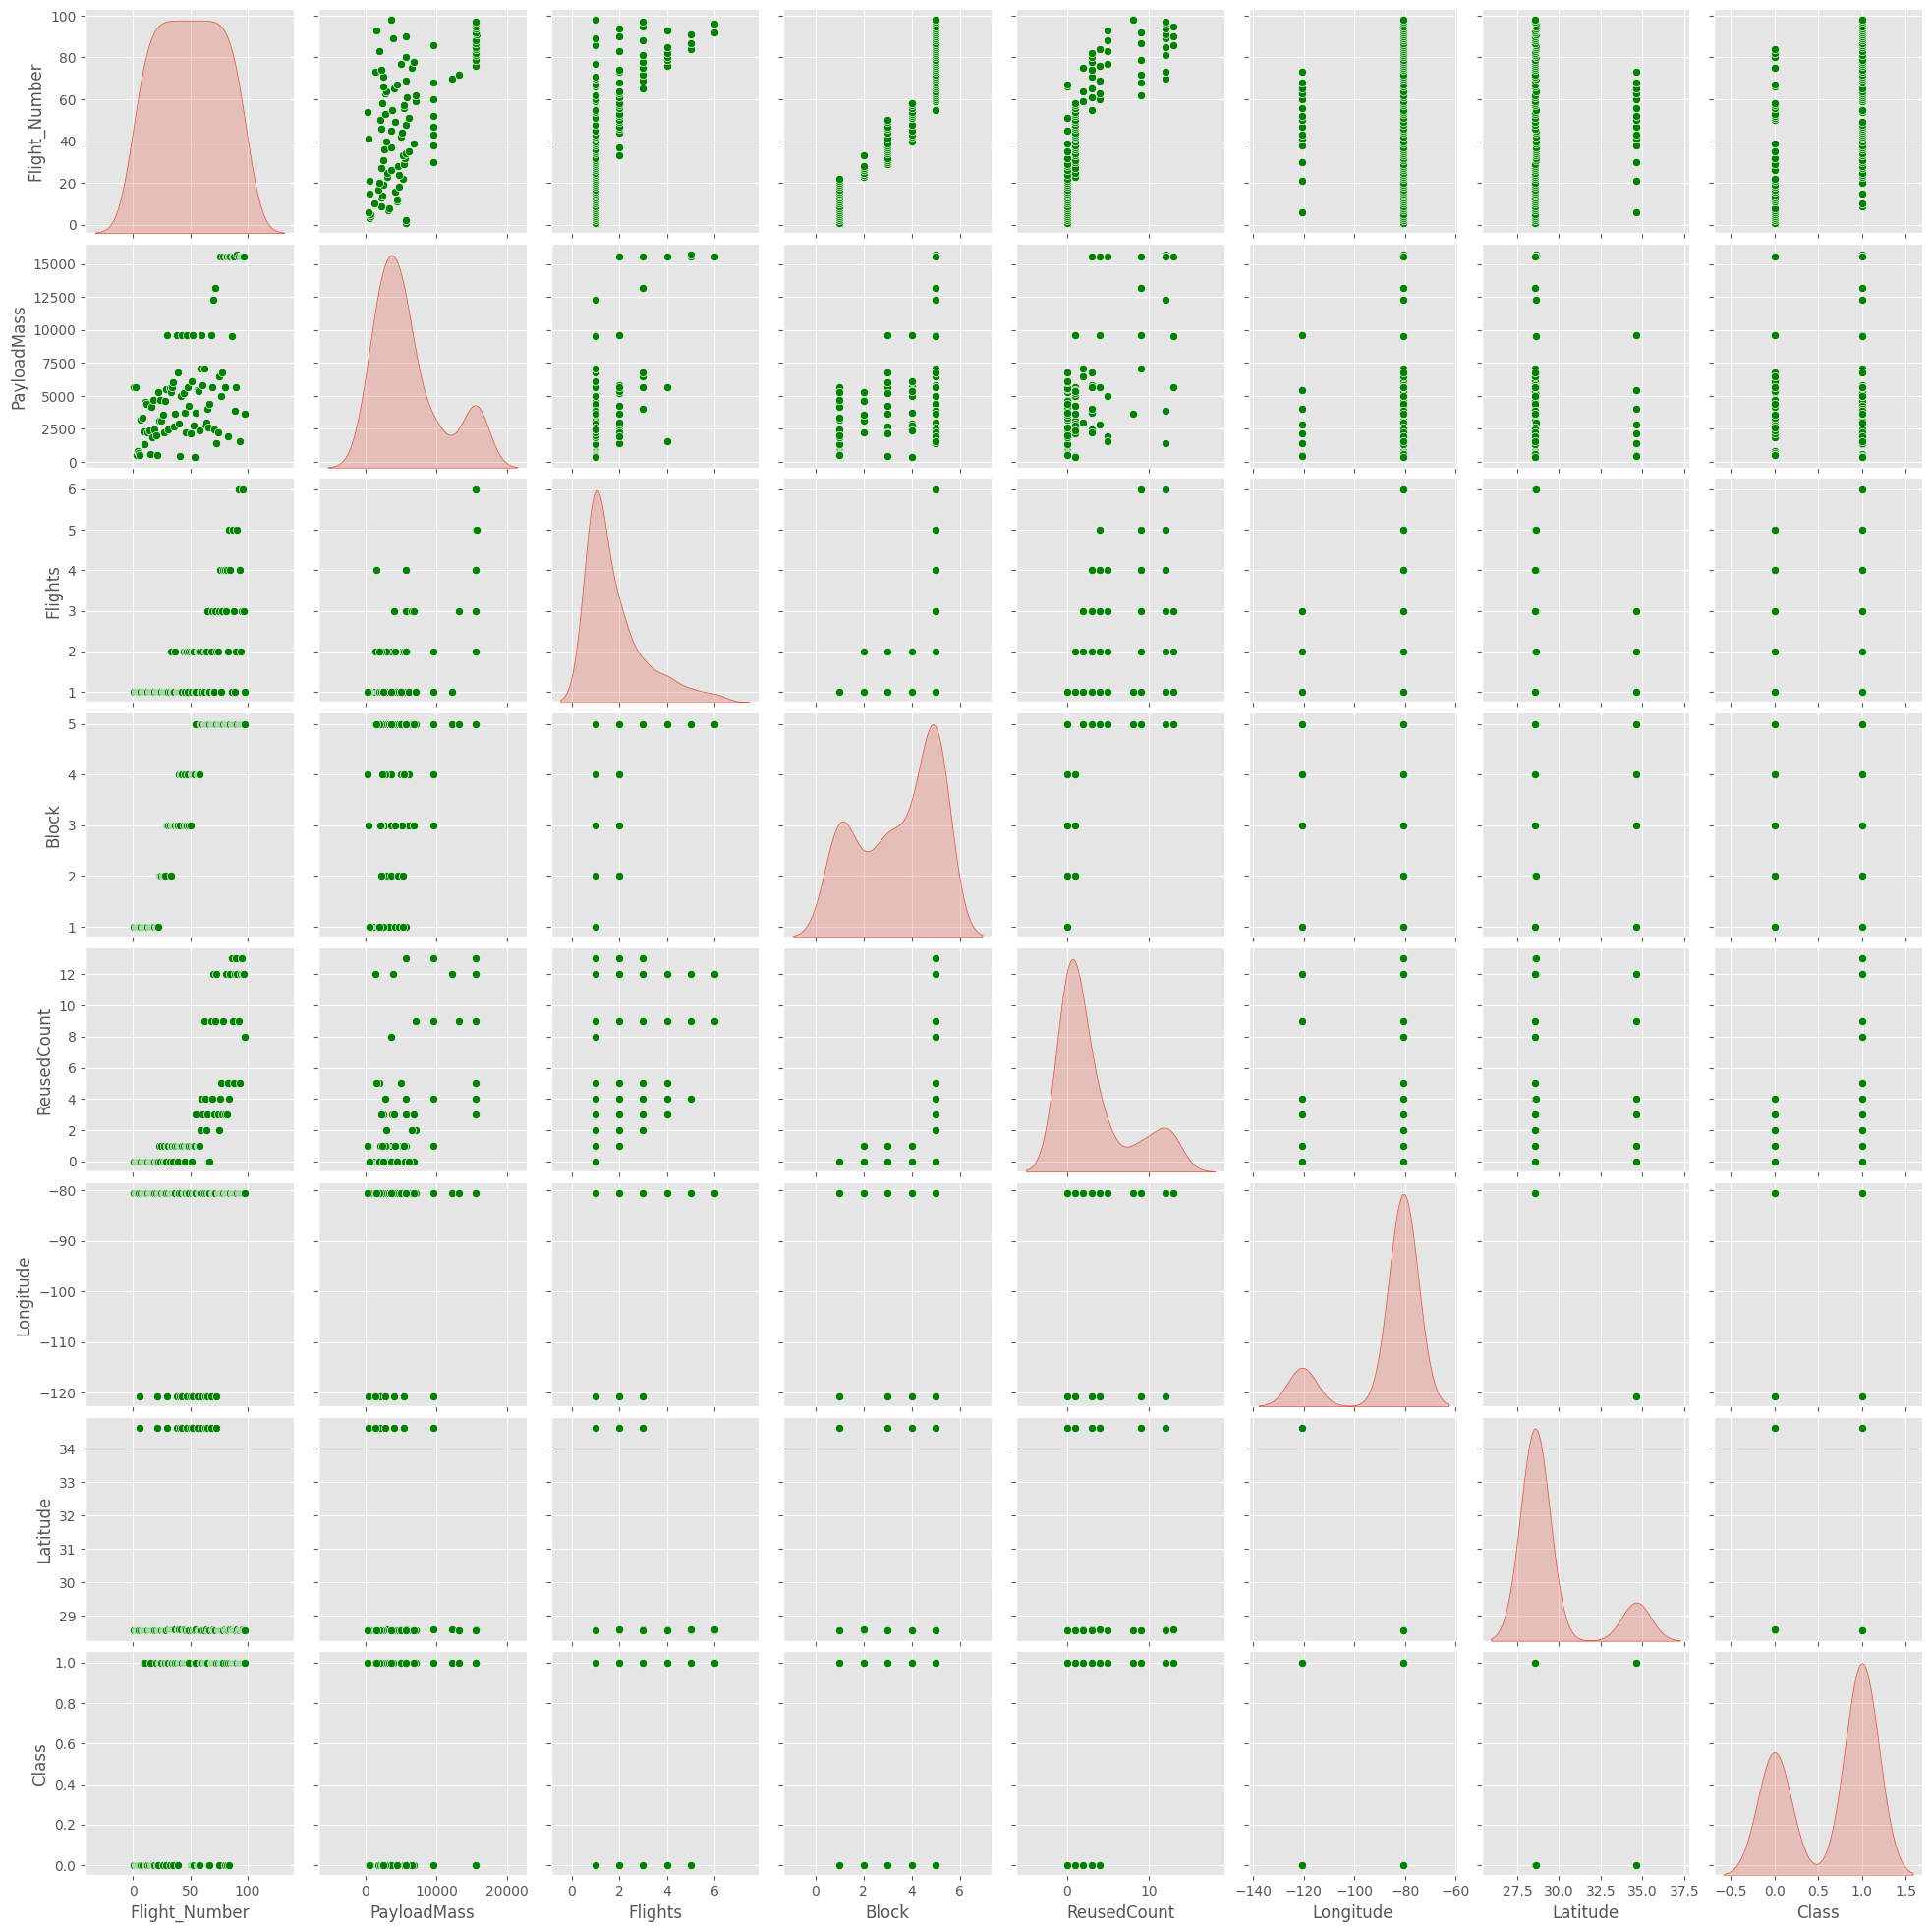

In [ ]:
sns.pairplot(numeric_df, diag_kind='kde', plot_kws={'color': 'green'})#why

In [ ]:
falcon_heat_map = falcon9_data[["Flight_Number","PayloadMass","Flights","Block","ReusedCount","Longitude","GridFins","Reused","Legs","Latitude","Class"]]

In [ ]:
falcon_heat_map.head()

,Flight_Number,PayloadMass,Flights,Block,ReusedCount,Longitude,GridFins,Reused,Legs,Latitude,Class
0,1,5694.158673,1,1.0,0,-80.577366,False,False,False,28.561857,0
1,2,5694.158673,1,1.0,0,-80.577366,False,False,False,28.561857,0
2,3,525.000000,1,1.0,0,-80.577366,False,False,False,28.561857,0
3,4,800.000000,1,1.0,0,-80.577366,False,False,False,28.561857,0
4,5,677.000000,1,1.0,0,-80.577366,False,False,False,28.561857,0


In [ ]:
bool_columns = ["GridFins","Legs","Reused"]
for col in bool_columns :
    falcon_heat_map[col] = falcon_heat_map[col].apply(lambda x : 1 if x else 0)
falcon_heat_map.head()

<ipython-input-42-5ee09027bbb8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  falcon_heat_map[col] = falcon_heat_map[col].apply(lambda x : 1 if x else 0)


,Flight_Number,PayloadMass,Flights,Block,ReusedCount,Longitude,GridFins,Reused,Legs,Latitude,Class
0,1,5694.158673,1,1.0,0,-80.577366,0,0,0,28.561857,0
1,2,5694.158673,1,1.0,0,-80.577366,0,0,0,28.561857,0
2,3,525.000000,1,1.0,0,-80.577366,0,0,0,28.561857,0
3,4,800.000000,1,1.0,0,-80.577366,0,0,0,28.561857,0
4,5,677.000000,1,1.0,0,-80.577366,0,0,0,28.561857,0


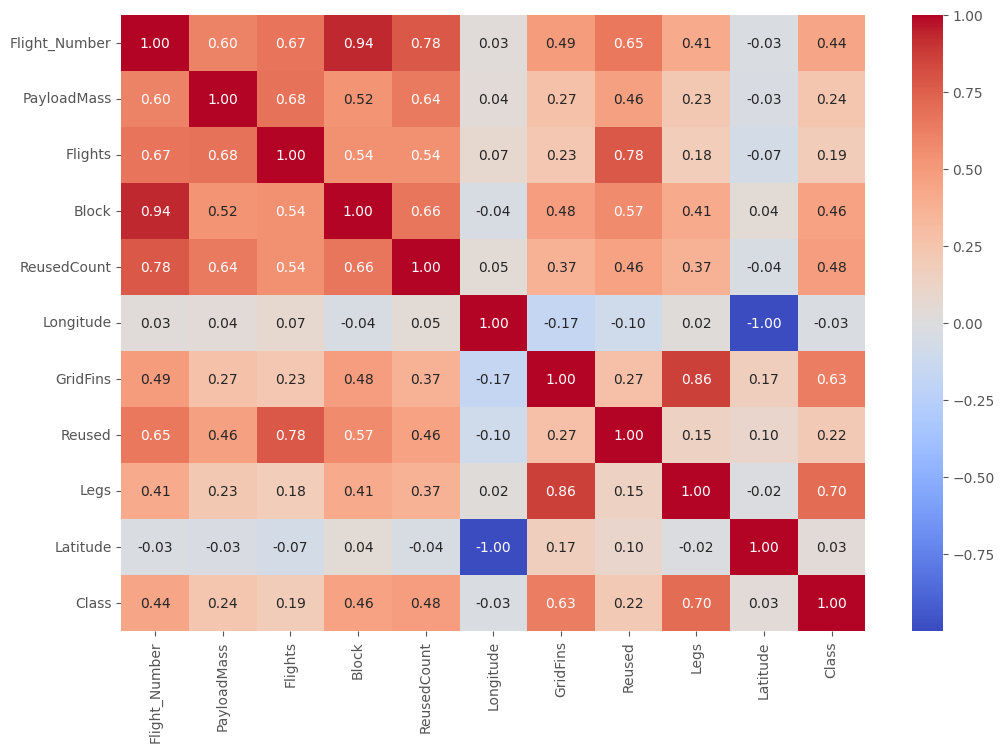

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(falcon_heat_map.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

# Now let's do an Interactive Visualization

## first we will make a map that will
*   determine the location of launchsites
*   their success count
*   Calculate Proximities
## Second we will make an Interactive visualization that calculate the spacex records





## first let's make a dataframe from our dataframe that hads LaunchSite , Latitude, Longitude

*   We will import folium and some plugins like markercluster( is a feature used to group multiple map markers together when they are close to each other.) and mouseposition(show the mouse current position on the map) and DivIcon (create custom HTML-based markers on maps)



In [ ]:
import folium
from folium.plugins import MarkerCluster
from folium.plugins import MousePosition
from folium.features import DivIcon



*  we will slice our data needed for the map from the falcon9_data



In [ ]:
falcon_9_map_data = falcon9_data[["LaunchSite","Latitude","Longitude"]]
falcon_9_map_data.head()

,LaunchSite,Latitude,Longitude
0,CCSFS SLC 40,28.561857,-80.577366
1,CCSFS SLC 40,28.561857,-80.577366
2,CCSFS SLC 40,28.561857,-80.577366
3,CCSFS SLC 40,28.561857,-80.577366
4,CCSFS SLC 40,28.561857,-80.577366




*   we will get the location of each site



In [ ]:
launch_site_locations = falcon_9_map_data.groupby("LaunchSite").agg({
    'Latitude': 'first',
    'Longitude': 'first'
})
launch_site_locations

,Latitude,Longitude
LaunchSite,,
CCSFS SLC 40,28.561857,-80.577366
KSC LC 39A,28.608058,-80.603956
VAFB SLC 4E,34.632093,-120.610829




*   first we show the map using initial location let's say the mean of the previous 3 locations



In [ ]:
sites_map = folium.Map(location=[launch_site_locations['Latitude'].mean(), launch_site_locations['Longitude'].mean()], zoom_start=5)
sites_map



*  Second we will draw a circle over the map at the launches sites with a text of their name over the circle using icondiv



In [ ]:
coordinates = launch_site_locations.values.tolist()
coordinates

[[28.5618571, -80.577366], [28.6080585, -80.6039558], [34.632093, -120.610829]]

In [ ]:
sites = launch_site_locations.index.tolist()
sites

['CCSFS SLC 40', 'KSC LC 39A', 'VAFB SLC 4E']

In [ ]:
for i in range(len(sites)) :
  circle = folium.Circle(coordinates[i],radius = 100,color = "green",fill = True).add_child(folium.Popup(sites[i]))
  marker = folium.map.Marker(coordinates[i],
                    icon = DivIcon(icon_size=(20,20),icon_anchor=(0,0)
                    ,html = '<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % sites[i]))
  sites_map.add_child(circle)
  sites_map.add_child(marker)

sites_map



* We will now indicate the success count of each launching location on the map with green meaning success launch from certain location and red for a failure one





*   to do so we will add a column of marker color to our data to indicate which color should be assigned



In [ ]:
def color_class (class_val) :
  if class_val == 1 :
    return "green"
  else :
    return "red"

In [ ]:
falcon_9_map_data["marker_color"] = falcon9_data["Class"].apply(color_class)

<ipython-input-52-6b8dde960159>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  falcon_9_map_data["marker_color"] = falcon9_data["Class"].apply(color_class)


In [ ]:
falcon_9_map_data.head()

,LaunchSite,Latitude,Longitude,marker_color
0,CCSFS SLC 40,28.561857,-80.577366,red
1,CCSFS SLC 40,28.561857,-80.577366,red
2,CCSFS SLC 40,28.561857,-80.577366,red
3,CCSFS SLC 40,28.561857,-80.577366,red
4,CCSFS SLC 40,28.561857,-80.577366,red




*  We will add a marker cluster so when we zoom in or out the markers group or seperate, then other markers for success and failure of the launch site



In [ ]:
marker_cluster=MarkerCluster()
sites_map.add_child(marker_cluster)
for index, record in falcon_9_map_data.iterrows():
    launchsite=record['LaunchSite']
    # Create and add a Marker cluster to the site map
    marker = folium.Marker([record['Latitude'], record['Longitude']],
                  icon=folium.Icon(color='white', icon_color=record['marker_color'],html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % launchsite,))
    marker_cluster.add_child(marker)
sites_map



*  Now we should Calculate the proximities distances (they arew the distance between launching site and some other sites like ocean , closest cities , railway , highway)





*   First we need to know the location of other places and we can do so by putting our mouse on that place and get its latitude and longitude



In [ ]:
formatter = "function(num) {return L.Util.formatNum(num, 5);};"
mouse_position = MousePosition(
    position='topright',
    separator=' Long: ',
    empty_string='NaN',
    lng_first=False,
    num_digits=20,
    prefix='Lat:',
    lat_formatter=formatter,
    lng_formatter=formatter,
)
sites_map.add_child(mouse_position)
sites_map



*   now we want a function to calculate the distance


In [ ]:
from math import sin, cos, sqrt, atan2, radians
def calculate_distance(lat1, lon1, lat2, lon2):
    # approximate radius of earth in km
    R = 6373.0
    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return distance



*   How far the launching site (VAFB SLC 4E) from the ocean ?



In [ ]:
distance = calculate_distance(34.63667,-120.62748,34.632093, -120.610829)
distance

1.6066801791731518



*   make a marker with this distance and add it to the map



In [ ]:
# coordinate = [34.63667,-120.62748]
# distance_marker = folium.Marker(
#     coordinate,
#     icon=DivIcon(
#         icon_size=(20,20),
#         icon_anchor=(0,0),
#         html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % "{:10.2f} KM".format(distance),
#         )
#     )
# sites_map.add_child(distance_marker)
# sites_map



*   Now Draw a line from the launch site to the ocean



In [ ]:
# coordinates=[[34.63667,-120.62748],[34.632093, -120.610829]]
# lines=folium.PolyLine(locations=coordinates, weight=1)
# sites_map.add_child(lines)



## Now let's do it for several distance




* proximities distances for **CCSFS SLC 40**   



In [ ]:
coordinates=[[28.56146,-80.56203] # ocean
             ,[28.57936 ,-80.65125] # logistics places
             ,[28.53597,-81.38054] # nearest city
             ]
coordinate=[28.561857, -80.577366]
for x in coordinates:
    lines=folium.PolyLine(locations=[x,coordinate], weight=1)
    sites_map.add_child(lines)

    distance_marker = folium.Marker(
        x,
        icon=DivIcon(
            icon_size=(20,20),
            icon_anchor=(0,0),
            html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % "{:10.2f} KM".format(calculate_distance(x[0],x[1],coordinate[0] ,coordinate[1])),
        )
    )
    sites_map.add_child(distance_marker)
sites_map

*  proximities distances for **KSC LC 39A**   



In [ ]:
coordinates=[[28.61444,-80.59502] # ocean
             ,[28.57936 ,-80.65125] # logistics places
             ,[28.53597,-81.38054] # nearest city
             ]
coordinate=[28.608058, -80.603956]
for x in coordinates:
    lines=folium.PolyLine(locations=[x,coordinate], weight=1)
    sites_map.add_child(lines)

    distance_marker = folium.Marker(
        x,
        icon=DivIcon(
            icon_size=(20,20),
            icon_anchor=(0,0),
            html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % "{:10.2f} KM".format(calculate_distance(x[0],x[1],coordinate[0] ,coordinate[1])),
        )
    )
    sites_map.add_child(distance_marker)
sites_map

*  proximities distances for **VAFB SLC 4E**  

In [ ]:
coordinates=[[34.63803,-120.63452] # ocean
             ,[34.63915,-120.45805] # nearest city
             ]
coordinate=[34.632093,	-120.610829]
for x in coordinates:
    lines=folium.PolyLine(locations=[x,coordinate], weight=1)
    sites_map.add_child(lines)

    distance_marker = folium.Marker(
        x,
        icon=DivIcon(
            icon_size=(20,20),
            icon_anchor=(0,0),
            html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % "{:10.2f} KM".format(calculate_distance(x[0],x[1],coordinate[0] ,coordinate[1])),
        )
    )
    sites_map.add_child(distance_marker)
sites_map

In [ ]:
!pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 45.7 MB/s eta 0:00:00


In [ ]:
# Import required libraries
import pandas as pd
import dash
from dash import html, dcc
from dash.dependencies import Input, Output
import plotly.express as px

# Read the airline data into pandas dataframe
spacex_df = pd.read_csv("spacex_launch_dash.csv")
max_payload = spacex_df['Payload Mass (kg)'].max()
min_payload = spacex_df['Payload Mass (kg)'].min()

# Create a dash application
app = dash.Dash(__name__)

# Create an app layout
app.layout = html.Div(children=[html.H1('SpaceX Launch Records Dashboard',
                                        style={'textAlign': 'center', 'color': '#1e13eb',
                                               'font-size': 40}),

                                dcc.Dropdown(id='site-dropdown',
                                             options=[
                                                {'label': 'All Sites', 'value': 'ALL'},
                                                {'label': 'CCAFS LC-40', 'value': 'CCAFS LC-40'},
                                                {'label': 'VAFB SLC-4E', 'value': 'VAFB SLC-4E'},
                                                {'label': 'KSC LC-39A', 'value': 'KSC LC-39A'},
                                                {'label': 'CCAFS SLC-40', 'value': 'CCAFS SLC-40'},
                                             ],
                                             value='ALL',
                                             placeholder='Select a Launch Site here',
                                             searchable=True
                                            ),
                                html.Br(),

                                html.Div(dcc.Graph(id='success-pie-chart')),
                                html.Br(),

                                html.P("Payload range (Kg):",style = {"color" : "#32a852"}),

                                dcc.RangeSlider(id='payload-slider', min=0, max=10000, step=1000, value=[min_payload, max_payload]),

                                html.Div(dcc.Graph(id='success-payload-scatter-chart')),
                                ])

@app.callback(Output(component_id='success-pie-chart', component_property='figure'),Input(component_id='site-dropdown', component_property='value'))

def get_pie_chart(entered_site):
    filtered_df = spacex_df
    if entered_site == 'ALL':
        fig = px.pie(filtered_df, values='class', names='Launch Site', title='Total Success Launches By Site')
        return fig
    else:
        filtered_df = spacex_df.loc[spacex_df['Launch Site'] == entered_site].groupby(['class'])['Launch Site'].count()
        fig = px.pie(filtered_df, values=filtered_df.values, names=filtered_df.index, title=f'Total Success Launches for site {entered_site}')
        return fig

@app.callback(Output(component_id='success-payload-scatter-chart', component_property='figure'),[Input(component_id='site-dropdown', component_property='value'), Input(component_id='payload-slider', component_property='value')])

def get_scatter_plot(entered_site, amount):
    min_amount = amount[0]
    max_amount = amount[1]
    filtered_df = spacex_df
    filtered_df = filtered_df.loc[(filtered_df['Payload Mass (kg)'] > min_amount) & (filtered_df['Payload Mass (kg)'] < max_amount)]
    if entered_site == 'ALL':
        fig = px.scatter(filtered_df, x='Payload Mass (kg)', y='class', color='Booster Version Category', title='Correlation between Payload and Success for all Sites')
        return fig
    else:
        filtered_df = spacex_df.loc[spacex_df['Launch Site'] == entered_site]
        filtered_df = filtered_df.loc[(filtered_df['Payload Mass (kg)'] > min_amount) & (filtered_df['Payload Mass (kg)'] < max_amount)]
        fig = px.scatter(filtered_df, x='Payload Mass (kg)', y='class', color='Booster Version Category', title=f'Correlation between Payload and Success for {entered_site}')
        return fig



# Run the app
if __name__ == '__main__':
    app.run_server()

<IPython.core.display.Javascript object>

## Converting Data to numerical values

In [ ]:
launches_data_ML = falcon9_data.drop(columns = ["Date"])
launches_data_ML.head()

,Flight_Number,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,Falcon 9,5694.158673,LEO,CCSFS SLC 40,None - None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,Falcon 9,5694.158673,LEO,CCSFS SLC 40,None - None,1,False,False,False,NaN,1.0,0,B0004,-80.577366,28.561857,0
2,3,Falcon 9,525.000000,LEO,CCSFS SLC 40,None - None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
3,4,Falcon 9,800.000000,ISS,CCSFS SLC 40,None - None,1,False,False,False,NaN,1.0,0,B0006,-80.577366,28.561857,0
4,5,Falcon 9,677.000000,ISS,CCSFS SLC 40,None - None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0


In [ ]:
launches_data_ML["Orbit"].unique()

array(['LEO', 'ISS', 'PO', 'GTO', 'ES-L1', 'SSO', 'HEO', 'MEO', 'VLEO',
       'SO', 'GEO'], dtype=object)

In [ ]:
orbit_types = launches_data_ML["Orbit"].unique()

In [ ]:
for orbit in orbit_types:
    launches_data_ML[orbit] = launches_data_ML["Orbit"].apply(lambda x: 1 if x == orbit else 0)

In [ ]:
launches_data_ML.drop(columns = ["Orbit"],inplace = True)

In [ ]:
launches_data_ML.head()

,Flight_Number,BoosterVersion,PayloadMass,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,...,ISS,PO,GTO,ES-L1,SSO,HEO,MEO,VLEO,SO,GEO
0,1,Falcon 9,5694.158673,CCSFS SLC 40,None - None,1,False,False,False,NaN,...,0,0,0,0,0,0,0,0,0,0
1,2,Falcon 9,5694.158673,CCSFS SLC 40,None - None,1,False,False,False,NaN,...,0,0,0,0,0,0,0,0,0,0
2,3,Falcon 9,525.000000,CCSFS SLC 40,None - None,1,False,False,False,NaN,...,0,0,0,0,0,0,0,0,0,0
3,4,Falcon 9,800.000000,CCSFS SLC 40,None - None,1,False,False,False,NaN,...,1,0,0,0,0,0,0,0,0,0
4,5,Falcon 9,677.000000,CCSFS SLC 40,None - None,1,False,False,False,NaN,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
launches_data_ML.shape

(98, 27)

In [ ]:
launches_data_ML["Serial"].unique()

array(['B0003', 'B0004', 'B0005', 'B0006', 'B0007', 'B1003', 'B1004',
       'B1005', 'B1006', 'B1007', 'B1008', 'B1011', 'B1010', 'B1012',
       'B1013', 'B1014', 'B1015', 'B1016', 'B1018', 'B1019', 'B1017',
       'B1020', 'B1021', 'B1022', 'B1023', 'B1024', 'B1025', 'B1026',
       'B1028', 'B1029', 'B1031', 'B1030', 'B1032', 'B1034', 'B1035',
       'B1036', 'B1037', 'B1039', 'B1038', 'B1040', 'B1041', 'B1042',
       'B1043', 'B1044', 'B1045', 'B1046', 'B1047', 'B1048', 'B1049',
       'B1050', 'B1054', 'B1051', 'B1056', 'B1059', 'B1058', 'B1060',
       'B1062'], dtype=object)

In [ ]:
serial_values = launches_data_ML["Serial"].unique()

In [ ]:
for serial_value in serial_values :
    launches_data_ML[serial_value] = launches_data_ML["Serial"].apply(lambda x : 1 if x == serial_value else 0 )

In [ ]:
launches_data_ML.drop(columns = ["Serial"],inplace = True)

In [ ]:
launches_data_ML.shape

(98, 83)

In [ ]:
launches_data_ML["GridFins"] = launches_data_ML["GridFins"].apply(lambda x : 1 if x else 0)

In [ ]:
launches_data_ML

,Flight_Number,BoosterVersion,PayloadMass,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,...,B1048,B1049,B1050,B1054,B1051,B1056,B1059,B1058,B1060,B1062
0,1,Falcon 9,5694.158673,CCSFS SLC 40,None - None,1,0,False,False,NaN,...,0,0,0,0,0,0,0,0,0,0
1,2,Falcon 9,5694.158673,CCSFS SLC 40,None - None,1,0,False,False,NaN,...,0,0,0,0,0,0,0,0,0,0
2,3,Falcon 9,525.000000,CCSFS SLC 40,None - None,1,0,False,False,NaN,...,0,0,0,0,0,0,0,0,0,0
3,4,Falcon 9,800.000000,CCSFS SLC 40,None - None,1,0,False,False,NaN,...,0,0,0,0,0,0,0,0,0,0
4,5,Falcon 9,677.000000,CCSFS SLC 40,None - None,1,0,False,False,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,94,Falcon 9,15600.000000,KSC LC 39A,True - ASDS,2,1,True,True,OCISLY,...,0,0,0,0,0,0,0,0,1,0
94,95,Falcon 9,15600.000000,KSC LC 39A,True - ASDS,3,1,True,True,OCISLY,...,0,0,0,0,0,0,0,1,0,0
95,96,Falcon 9,15600.000000,KSC LC 39A,True - ASDS,6,1,True,True,OCISLY,...,0,0,0,0,1,0,0,0,0,0
96,97,Falcon 9,15600.000000,CCSFS SLC 40,True - ASDS,3,1,True,True,JRTI,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
launches_data_ML["Reused"] = launches_data_ML["Reused"].apply(lambda x : 1 if x else 0)

In [ ]:
launches_data_ML.columns

Index(['Flight_Number', 'BoosterVersion', 'PayloadMass', 'LaunchSite',
       'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad',
       'Block', 'ReusedCount', 'Longitude', 'Latitude', 'Class', 'LEO', 'ISS',
       'PO', 'GTO', 'ES-L1', 'SSO', 'HEO', 'MEO', 'VLEO', 'SO', 'GEO', 'B0003',
       'B0004', 'B0005', 'B0006', 'B0007', 'B1003', 'B1004', 'B1005', 'B1006',
       'B1007', 'B1008', 'B1011', 'B1010', 'B1012', 'B1013', 'B1014', 'B1015',
       'B1016', 'B1018', 'B1019', 'B1017', 'B1020', 'B1021', 'B1022', 'B1023',
       'B1024', 'B1025', 'B1026', 'B1028', 'B1029', 'B1031', 'B1030', 'B1032',
       'B1034', 'B1035', 'B1036', 'B1037', 'B1039', 'B1038', 'B1040', 'B1041',
       'B1042', 'B1043', 'B1044', 'B1045', 'B1046', 'B1047', 'B1048', 'B1049',
       'B1050', 'B1054', 'B1051', 'B1056', 'B1059', 'B1058', 'B1060', 'B1062'],
      dtype='object')

In [ ]:
launches_data_ML["Legs"] = launches_data_ML["Legs"].apply(lambda x : 1 if x else 0)

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
launches_data_ML.head()

,Flight_Number,BoosterVersion,PayloadMass,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Longitude,Latitude,Class,LEO,ISS,PO,GTO,ES-L1,SSO,HEO,MEO,VLEO,SO,GEO,B0003,B0004,B0005,B0006,B0007,B1003,B1004,B1005,B1006,B1007,B1008,B1011,B1010,B1012,B1013,B1014,B1015,B1016,B1018,B1019,B1017,B1020,B1021,B1022,B1023,B1024,B1025,B1026,B1028,B1029,B1031,B1030,B1032,B1034,B1035,B1036,B1037,B1039,B1038,B1040,B1041,B1042,B1043,B1044,B1045,B1046,B1047,B1048,B1049,B1050,B1054,B1051,B1056,B1059,B1058,B1060,B1062
0,1,Falcon 9,5694.158673,CCSFS SLC 40,None - None,1,0,0,0,NaN,1.0,0,-80.577366,28.561857,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,Falcon 9,5694.158673,CCSFS SLC 40,None - None,1,0,0,0,NaN,1.0,0,-80.577366,28.561857,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,Falcon 9,525.000000,CCSFS SLC 40,None - None,1,0,0,0,NaN,1.0,0,-80.577366,28.561857,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,Falcon 9,800.000000,CCSFS SLC 40,None - None,1,0,0,0,NaN,1.0,0,-80.577366,28.561857,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,Falcon 9,677.000000,CCSFS SLC 40,None - None,1,0,0,0,NaN,1.0,0,-80.577366,28.561857,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
launch_sites = launches_data_ML["LaunchSite"].unique()
launch_sites

array(['CCSFS SLC 40', 'VAFB SLC 4E', 'KSC LC 39A'], dtype=object)

In [ ]:
for launch_site in launch_sites :
    launches_data_ML[launch_site] = launches_data_ML["LaunchSite"].apply(lambda x : 1 if x==launch_site else 0 )

In [ ]:
launches_data_ML.drop(columns = "LaunchSite" , inplace = True)

In [ ]:
launches_data_ML.head()

,Flight_Number,BoosterVersion,PayloadMass,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Longitude,Latitude,Class,LEO,ISS,PO,GTO,ES-L1,SSO,HEO,MEO,VLEO,SO,GEO,B0003,B0004,B0005,B0006,B0007,B1003,B1004,B1005,B1006,B1007,B1008,B1011,B1010,B1012,B1013,B1014,B1015,B1016,B1018,B1019,B1017,B1020,B1021,B1022,B1023,B1024,B1025,B1026,B1028,B1029,B1031,B1030,B1032,B1034,B1035,B1036,B1037,B1039,B1038,B1040,B1041,B1042,B1043,B1044,B1045,B1046,B1047,B1048,B1049,B1050,B1054,B1051,B1056,B1059,B1058,B1060,B1062,CCSFS SLC 40,VAFB SLC 4E,KSC LC 39A
0,1,Falcon 9,5694.158673,None - None,1,0,0,0,NaN,1.0,0,-80.577366,28.561857,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,Falcon 9,5694.158673,None - None,1,0,0,0,NaN,1.0,0,-80.577366,28.561857,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Falcon 9,525.000000,None - None,1,0,0,0,NaN,1.0,0,-80.577366,28.561857,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Falcon 9,800.000000,None - None,1,0,0,0,NaN,1.0,0,-80.577366,28.561857,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,5,Falcon 9,677.000000,None - None,1,0,0,0,NaN,1.0,0,-80.577366,28.561857,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
launches_data_ML.drop(columns = ["Outcome"] , inplace = True)

In [ ]:
launches_data_ML.drop(columns = ["BoosterVersion"] , inplace = True)

In [ ]:
launches_data_ML.head()

,Flight_Number,PayloadMass,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Longitude,Latitude,Class,LEO,ISS,PO,GTO,ES-L1,SSO,HEO,MEO,VLEO,SO,GEO,B0003,B0004,B0005,B0006,B0007,B1003,B1004,B1005,B1006,B1007,B1008,B1011,B1010,B1012,B1013,B1014,B1015,B1016,B1018,B1019,B1017,B1020,B1021,B1022,B1023,B1024,B1025,B1026,B1028,B1029,B1031,B1030,B1032,B1034,B1035,B1036,B1037,B1039,B1038,B1040,B1041,B1042,B1043,B1044,B1045,B1046,B1047,B1048,B1049,B1050,B1054,B1051,B1056,B1059,B1058,B1060,B1062,CCSFS SLC 40,VAFB SLC 4E,KSC LC 39A
0,1,5694.158673,1,0,0,0,NaN,1.0,0,-80.577366,28.561857,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,5694.158673,1,0,0,0,NaN,1.0,0,-80.577366,28.561857,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,525.000000,1,0,0,0,NaN,1.0,0,-80.577366,28.561857,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,800.000000,1,0,0,0,NaN,1.0,0,-80.577366,28.561857,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,5,677.000000,1,0,0,0,NaN,1.0,0,-80.577366,28.561857,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
launches_data_ML["LandingPad"].isnull().sum()

31

In [ ]:
launches_data_ML.dropna(subset = ["LandingPad"],inplace = True)

In [ ]:
landingpads = launches_data_ML["LandingPad"].unique()
landingpads

array(['JRTI-1', 'OCISLY', 'LZ-1', 'JRTI', 'LZ-4'], dtype=object)

In [ ]:
for landingpad in landingpads :
    launches_data_ML[landingpad] = launches_data_ML["LandingPad"].apply(lambda x : 1 if x==landingpad else 0 )

In [ ]:
launches_data_ML.drop(columns = ["LandingPad"],inplace = True)

In [ ]:
launches_data_ML.head()

,Flight_Number,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Longitude,Latitude,Class,LEO,ISS,PO,GTO,ES-L1,SSO,HEO,MEO,VLEO,SO,GEO,B0003,B0004,B0005,B0006,B0007,B1003,B1004,B1005,B1006,B1007,B1008,B1011,B1010,B1012,B1013,B1014,B1015,B1016,B1018,B1019,B1017,B1020,B1021,B1022,B1023,B1024,B1025,B1026,B1028,B1029,B1031,B1030,B1032,B1034,B1035,B1036,B1037,B1039,B1038,B1040,B1041,B1042,B1043,B1044,B1045,B1046,B1047,B1048,B1049,B1050,B1054,B1051,B1056,B1059,B1058,B1060,B1062,CCSFS SLC 40,VAFB SLC 4E,KSC LC 39A,JRTI-1,OCISLY,LZ-1,JRTI,LZ-4
13,14,2395.0,1,1,0,1,1.0,0,-80.577366,28.561857,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
16,17,1898.0,1,1,0,1,1.0,0,-80.577366,28.561857,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
18,19,2477.0,1,1,0,1,1.0,0,-80.577366,28.561857,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
19,20,2034.0,1,1,0,1,1.0,0,-80.577366,28.561857,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
20,21,553.0,1,1,0,1,1.0,0,-120.610829,34.632093,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
launches_data_ML.shape

(67, 87)

In [ ]:
launches_data_ML.to_csv("launches_data_ML.csv",index = False)